In [ ]:
!pip install bt
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import bt

     |████████████████████████████████| 2.7MB 17.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765241 sha256=ce26948f52e6f9279fdfd75c0e08d123679399907e2450e5f3668945b477fbee
  Stored in directory: /root/.cache/pip/wheels/18/2a/31/ead0e40a43116c3278ea50bdec622d43c9e51263b8a62ad71c
Successfully built bt


In [ ]:
ticker = 'SPY'
period1 = int(time.mktime(datetime.datetime(2015,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021,4,22,23,59).timetuple()))
interval = '1d' #1wk,1m
query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"

In [ ]:
df = pd.read_csv(query_string, index_col= 'Date')
print(df.head(),df.dtypes) #checking dataframe to ensure correct

                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2015-12-01  209.440002  210.820007  ...  189.531876   97858400
2015-12-02  210.619995  211.000000  ...  187.597702  108441300
2015-12-03  208.830002  209.149994  ...  184.970825  166224200
2015-12-04  205.610001  209.970001  ...  188.578293  192913900
2015-12-07  209.229996  209.729996  ...  187.435791  102027100

[5 rows x 6 columns] Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [ ]:
#candlestick data and figure
candlestick = go.Candlestick(x=df.index, open = df['Open'], high = df['High'],
                             low = df['Low'], close = df['Close'])
fig = go.Figure(data =[candlestick])
fig.update_layout(title = 'SPY Prices')
fig.show()

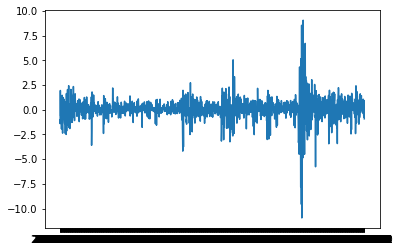

In [ ]:
#Calculating daily returns
df['Daily_Returns'] = df['Close'].pct_change()*100
df.head()
plt.plot(df['Daily_Returns'])
plt.show()

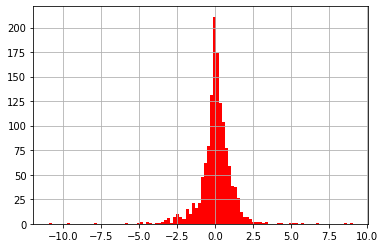

In [ ]:
#histogram
df['Daily_Returns'].hist(bins = 100, color = 'red')
plt.show()

In [ ]:
#Various indicators via bt package
bt_data = bt.get('goog,amzn,tsla',start = '2020-01-01', end = '2021-04-22')
print(bt_data.head(20))

                   goog         amzn        tsla
Date                                            
2020-01-02  1367.369995  1898.010010   86.052002
2020-01-03  1360.660034  1874.969971   88.601997
2020-01-06  1394.209961  1902.880005   90.307999
2020-01-07  1393.339966  1906.859985   93.811996
2020-01-08  1404.319946  1891.969971   98.428001
2020-01-09  1419.829956  1901.050049   96.267998
2020-01-10  1429.729980  1883.160034   95.629997
2020-01-13  1439.229980  1891.300049  104.972000
2020-01-14  1430.880005  1869.439941  107.584000
2020-01-15  1439.199951  1862.020020  103.699997
2020-01-16  1451.699951  1877.939941  102.697998
2020-01-17  1480.390015  1864.719971  102.099998
2020-01-21  1484.400024  1892.000000  109.440002
2020-01-22  1485.949951  1887.459961  113.912003
2020-01-23  1486.650024  1884.579956  114.440002
2020-01-24  1466.709961  1861.640015  112.963997
2020-01-27  1433.900024  1828.339966  111.603996
2020-01-28  1452.560059  1853.250000  113.379997
2020-01-29  1458.630

In [ ]:
#defining strat
bt_strategy = bt.Strategy('Trade_Weekly',[bt.algos.RunWeekly(),
                                          bt.algos.SelectAll(),
                                          bt.algos.WeighEqually(),
                                          bt.algos.Rebalance()])
#sell stock that has risen in value, and redistr. the profit to buy a stock that has fallen in price maintaining equal amt. of holdngs in each stock.


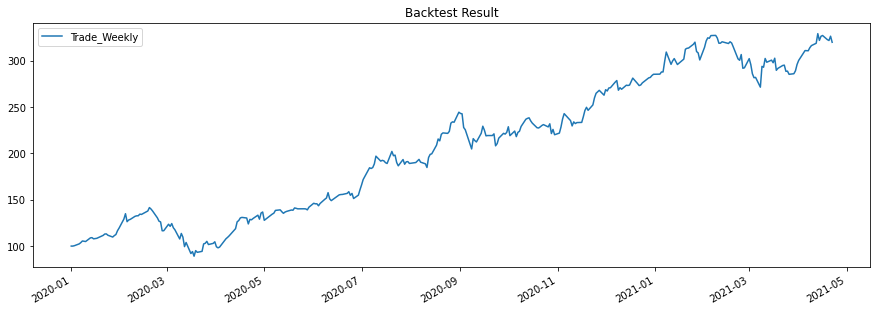

In [ ]:
#Backtest
bt_test = bt.Backtest(bt_strategy,bt_data)
bt_res = bt.run(bt_test)
bt_res.plot(title = 'Backtest Result')

In [ ]:
bt_res.get_transactions()

price  quantity
Date       Security                       
2020-01-02 amzn      1898.010010     175.0
           goog      1367.369995     243.0
           tsla        86.052002    3873.0
2020-01-06 amzn      1902.880005       4.0
           goog      1394.209961       1.0
...                          ...       ...
2021-04-12 goog      2254.790039       5.0
           tsla       701.979980      14.0
2021-04-19 amzn      3372.010010       4.0
           goog      2302.399902      -4.0
           tsla       714.630005      -8.0

[203 rows x 2 columns]